In [ ]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns


microsoft = pd.read_csv('MicrosoftStock.csv')
print(microsoft.head())

microsoft.shape
microsoft.info()



In [ ]:
microsoft.describe()


In [ ]:
plt.plot(microsoft['date'],
		microsoft['open'],
		color="blue",
		label="open")
plt.plot(microsoft['date'],
		microsoft['close'],
		color="green",
		label="close")
plt.title("Microsoft Open-Close Stock")
plt.legend()


In [ ]:
plt.plot(microsoft['date'],
		microsoft['volume'])
plt.show()


In [ ]:
sns.heatmap(microsoft.corr(),
			annot=True,
			cbar=False)
plt.show()


In [ ]:
microsoft['date'] = pd.to_datetime(microsoft['date'])
prediction = microsoft.loc[(microsoft['date']
							> datetime(2013, 1, 1))
							& (microsoft['date']
							< datetime(2018, 1, 1))]

plt.figure(figsize=(10, 10))
plt.plot(microsoft['date'], microsoft['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Microsoft Stock Prices")


In [5]:
msft_close = microsoft.filter(['close'])
dataset = msft_close.values
training = int(np.ceil(len(dataset) * 0.95))

# scale the data
ss = StandardScaler()
ss = ss.fit_transform(dataset)

train_data = ss[0:int(training), :]

x_train = []
y_train = []

# considering 60 as the batch size,
# create the X_train and y_train
for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape
							=(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 58369 (228.00 KB)
Trainable params: 58369 (228.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
from keras.metrics import RootMeanSquaredError
model.compile(optimizer='adam',
			loss='mae',
			metrics=RootMeanSquaredError())

history = model.fit(X_train, y_train,
					epochs=20)


In [ ]:
testing = ss[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(testing)):
	x_test.append(testing[i-60:i, 0])

x_test = np.array(x_test)
X_test = np.reshape(x_test,
					(x_test.shape[0],
					x_test.shape[1], 1))

pred = model.predict(X_test)


2/2 [==============================] - 1s 19ms/step


<ipython-input-29-9e6c5d79257a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred


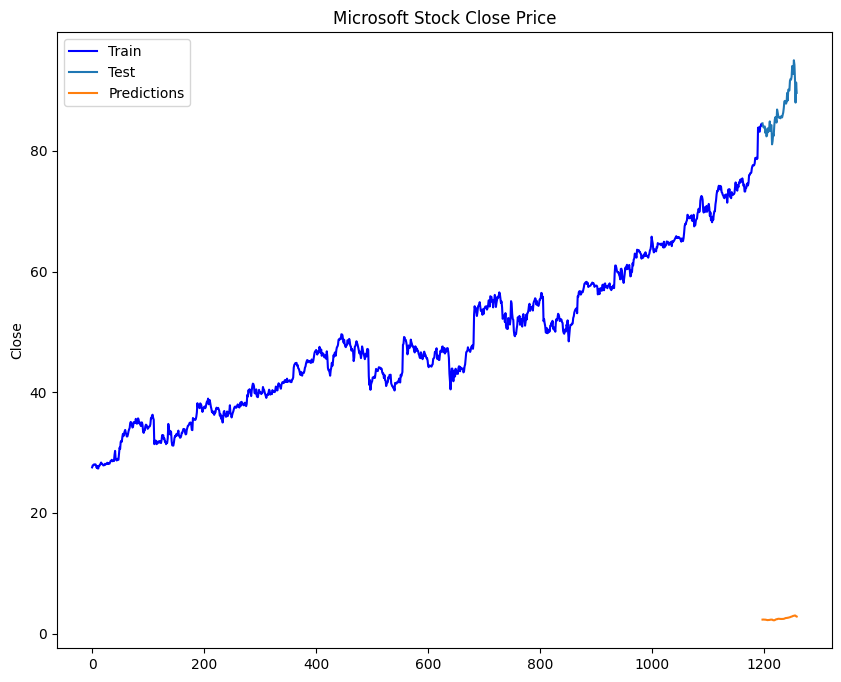

In [ ]:
train = microsoft[:training]
test = microsoft[training:]
test['Predictions'] = pred

plt.figure(figsize=(10, 8))
plt.plot(train['close'], c="b")
plt.plot(test[['close', 'Predictions']])
plt.title('Microsoft Stock Close Price')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])
